# The Best Team
The purpose of this jupyter notebook will be to determine who is the best baseball team of all time. This, of course, is no small feat and will likely be hotly contested.
There are a very large number of ways that this can be approached that are all biased in one way or another.
* We could calculate the total number of wins over time that a team has gained, however this is biased to the teams that have been around for a long time.
* We could calculate the average number of wins / season, however this has the potential to bias towards teams that were only around for a few very hot seasons.
------------------
* A cumulative strategy will need to be adopted. First teams will be evaluated based upon their average wins / season.
* Next, the teams will be evaluated based upon the number of titles that they have achieved and the years of those titles.
* From this we will attempt to draw a conclusion of the best team over time.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

In [3]:
# Read in our data from the Teams.csv file
# This file contains all sorts of data about the games played and cumulative team stats for each year a team has played
filename = './Data/Teams.csv'
teams_df = pd.read_csv(filename)
teams_df.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,NaN,0.81,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,NaN,0.80,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [4]:
# Determine how many teams we have
len(teams_df['name'].unique())

139

In [71]:
# Create a cumulative sum of the wins of each team and place it in a column
teams_df['Cumulative Wins'] = teams_df.groupby(['name'])['W'].cumsum()

# Create a smaller dataframe with just the data that we want to use
small_df = teams_df[['name','Cumulative Wins','G','Ghome','yearID']]
teamnames = small_df['name'].unique()

# Sort and visualize the dataframe
small_df = small_df.sort_values(['name','yearID'])
small_df

,name,Cumulative Wins,G,Ghome,yearID
124,Altoona Mountain City,6,25,NaN,1884
2237,Anaheim Angels,84,162,82.0,1997
2265,Anaheim Angels,169,162,81.0,1998
2295,Anaheim Angels,239,162,81.0,1999
2325,Anaheim Angels,321,162,81.0,2000
...,...,...,...,...,...
278,Washington Statesmen,44,139,NaN,1891
154,Wilmington Quicksteps,2,18,NaN,1884
85,Worcester Ruby Legs,40,85,NaN,1880
93,Worcester Ruby Legs,72,83,NaN,1881


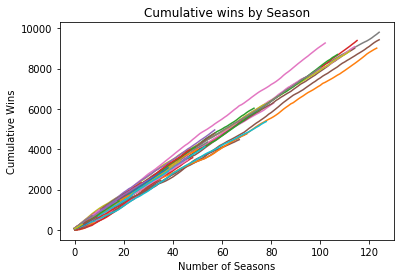

Team with the highest win rate: Los Angeles Angels of Anaheim
They played for: 11 seasons
And they won: 991 games
Overall Win Rate: 90.0909090909091


In [56]:
# In this cell we loop through each team and plot their cumulative wins over the number of seasons they've played
count = 0
winrate = 0
teamwinner = ""
numseason = 0
numwins = 0
winratedictionary = {}
for team in teamnames:
    temp_df = small_df.loc[small_df['name'] == team,:]
    seasons = temp_df['name'].count()
    calc = temp_df['Cumulative Wins'].iloc[-1] / seasons
    winratedictionary[team] = []
    winratedictionary[team].append(calc)

    plt.plot(range(temp_df['name'].count()),temp_df['Cumulative Wins'])
        
    if calc > winrate:
        teamwinner = team
        winrate = calc
        numseason = seasons
        numwins = temp_df['Cumulative Wins'].iloc[-1]

plt.title('Cumulative wins by Season')
plt.xlabel('Number of Seasons')
plt.ylabel('Cumulative Wins')
plt.show()

# Print out the team with the highest win rate
# It actually is not the line that we see with a higher slope than the rest of them, this team has only been around
# for 11 seasons
print("Team with the highest win rate: " + teamwinner)
print('They played for: ' + str(numseason) + ' seasons')
print('And they won: ' + str(numwins) + ' games')
print('Overall Win Rate: ' + str(winrate))


In [103]:
# Take the winrates calculated above and place them into a separate dataframe
winrate_df = pd.DataFrame(winratedictionary)
winrate_df = winrate_df.transpose()

# Bump team name out of the index
winrate_df = winrate_df.reset_index()

# Rename the columns to match what we want them to be in the final dataframe
winrate_df = winrate_df.rename(columns = {'index':'name',0:'Win Rate'})

In [114]:
# Merge the winrate dataframe with our small dataframe
merged_df = pd.merge(small_df,winrate_df, left_on = 'name',right_on = 'name')
merged_df = merged_df.sort_values(['Win Rate','yearID'], ascending = False)

# Now we create a dataframe which focuses on the winrate so we can visualize our data more easily in the dataframe
mean_vals_df = merged_df.groupby('name').mean()

# Create a season count and add it to our dataframe
seasoncount = merged_df.groupby('name')['G'].count()
mean_vals_df['Seasons'] = seasoncount

mean_vals_df = mean_vals_df.sort_values('Win Rate', ascending = False)
mean_vals_df = mean_vals_df.reset_index()
mean_vals_df

,name,Cumulative Wins,G,Ghome,yearID,Win Rate,Seasons
0,Los Angeles Angels of Anaheim,549.181818,162.000000,81.000000,2010.0,90.090909,11
1,New York Yankees,4650.417476,156.679612,78.339806,1964.0,89.961165,103
2,Tampa Bay Rays,408.125000,162.125000,81.375000,2011.5,88.375000,8
3,Milwaukee Braves,624.076923,157.230769,78.692308,1959.0,88.153846,13
4,Chicago Chi-Feds,87.000000,157.000000,NaN,1914.0,87.000000,1
...,...,...,...,...,...,...,...
134,St. Paul White Caps,2.000000,9.000000,NaN,1884.0,2.000000,1
135,Philadelphia Centennials,2.000000,14.000000,NaN,1875.0,2.000000,1
136,Wilmington Quicksteps,2.000000,18.000000,NaN,1884.0,2.000000,1
137,Keokuk Westerns,1.000000,13.000000,NaN,1875.0,1.000000,1


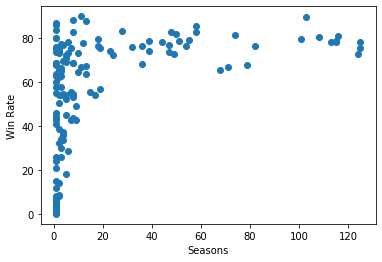

In [115]:
plt.scatter(mean_vals_df['Seasons'],mean_vals_df['Win Rate'], label = mean_vals_df['name'])
plt.xlabel('Seasons')
plt.ylabel('Win Rate')
plt.show()

This chart visualizes the relationship between number of seasons played and the win rate of a team. As expected there is an enormous grouping of teams hovering around the < 10 seasons mark. These teams, while potentially interesting for other reasons, may not be useful for our analysis.

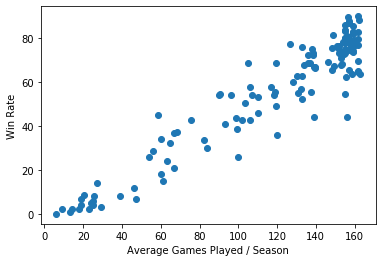

In [117]:
plt.scatter(mean_vals_df['G'],mean_vals_df['Win Rate'])
plt.xlabel('Average Games Played / Season')
plt.ylabel('Win Rate')
plt.show()

This chart, once plotted, does seem quite obvious. The higher the average number of games played per season the higher your number of wins / season. There are a few teams that are outliers above and below the pack, but this chart is too coarse to give insight into whether they are true outliers.